In [1]:
import os
import analyzing_tools as at

In [2]:
problem = 'sparseview_CT_ADMM_TV_total'
config_name = 'AAPM_256_ncsnpp_continuous'

method = 'TGV_old'

path_root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/volume/'

root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/'

at.load_recon_gt_to_volume(root, volume_file_name='volume_198.npy', gt_file_name='ground_truth_198.npy')

volume_TGV_old_8views, groud_truth = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

In [3]:
print(volume_TGV_old_8views.shape)
print(groud_truth.shape)

result_TGV_old_8views = at.extract_slices_and_evaluate(volume_TGV_old_8views, groud_truth)

aa = result_TGV_old_8views['Axial']['PSNR']
ab = result_TGV_old_8views['Axial']['SSIM']
ba = result_TGV_old_8views['Coronal']['PSNR']
bb = result_TGV_old_8views['Coronal']['SSIM']
ca = result_TGV_old_8views['Sagittal']['PSNR']
cb = result_TGV_old_8views['Sagittal']['SSIM']

print(f'Axial    || Average PSNR: {aa} || Average SSIM: {ab}')
print(f'Coronal  || Average PSNR: {ba} || Average SSIM: {bb}')
print(f'Sagittal || Average PSNR: {ca} || Average SSIM: {cb}')

(198, 1, 256, 256)
(198, 1, 256, 256)
Axial    || Average PSNR: 31.423339116718765 || Average SSIM: 0.8524495577066454
Coronal  || Average PSNR: 26.784238621295014 || Average SSIM: 0.645605314533154
Sagittal || Average PSNR: 30.175283652948607 || Average SSIM: 0.784906735054856


In [3]:
method = 'TGV'
path_root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/volume/'

root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/'

at.load_recon_gt_to_volume(root, volume_file_name='volume_198.npy', gt_file_name='ground_truth_198.npy')

volume_TGV_8views, groud_truth = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

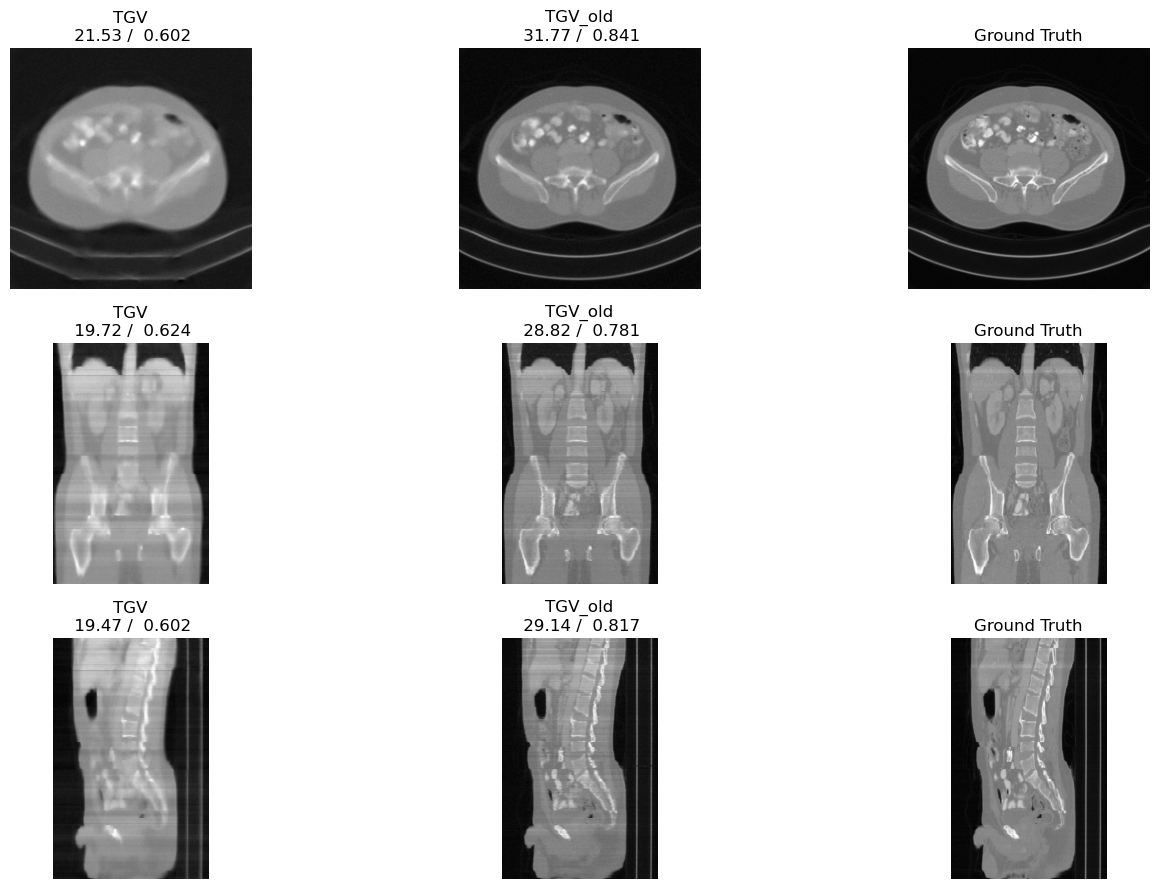

In [4]:
at.plot_comparison([volume_TGV_8views, volume_TGV_old_8views], ['TGV', 'TGV_old'], groud_truth, inset=True)

In [ ]:
problem = 'sparseview_CT_ADMM_TV_total'
config_name = 'AAPM_256_ncsnpp_continuous'

method = 'TV'

path_root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho_{10}-lambda_{0.04}/volume/'
volume_TV_8views, groud_truth = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

path_root = f'./results/{config_name}/{problem}/{method}/n_view{4}/rho_{10}-lambda_{0.04}/volume/'
volume_TV_4views, _ = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

path_root = f'./results/{config_name}/{problem}/{method}/n_view{2}/rho_{10}-lambda_{0.04}/volume/'
volume_TV_2views, _ = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

method = 'TGV'

path_root = f'./results/{config_name}/{problem}/{method}/n_view{8}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/volume/'
volume_TGV_old_8views, _ = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

path_root = f'./results/{config_name}/{problem}/{method}/n_view{4}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/volume/'
volume_TGV_4views, _ = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

path_root = f'./results/{config_name}/{problem}/{method}/n_view{2}/rho0_{5}-rho1_{5}-lambda_{0.04}-alpha0_{2.5}-alpha_1_{2.5}/volume/'
volume_TGV_2views, _ = at.load_volume(path_root, 'volume_198.npy', 'ground_truth_198.npy')

In [ ]:
result_TV_8views = at.extract_slices_and_evaluate(volume_TV_8views, groud_truth)
result_TV_4views = at.extract_slices_and_evaluate(volume_TV_4views, groud_truth)
result_TV_2views = at.extract_slices_and_evaluate(volume_TV_2views, groud_truth)

result_TGV_old_8views = at.extract_slices_and_evaluate(volume_TGV_old_8views, groud_truth)
result_TGV_4views = at.extract_slices_and_evaluate(volume_TGV_4views, groud_truth)
result_TGV_2views = at.extract_slices_and_evaluate(volume_TGV_2views, groud_truth)

data_dict_TV = {
    '8 views': result_TV_8views,
    '4 views': result_TV_4views,
    '2 views': result_TV_2views
}

data_dict_TGV = {
    '8 views': result_TGV_old_8views,
    '4 views': result_TGV_4views,
    '2 views': result_TGV_2views
}

dict_list = []
dict_list.append(at.flatten_nested_dict(data_dict_TV))
dict_list.append(at.flatten_nested_dict(data_dict_TGV))

data_df = at.flatten_dicts_to_df(dict_list, ['Diffusion_ADMM_TV', 'Diffusion_ADMM_TGV'])

at.table_comparison(data_df, 'PSNR, SSIM')

In [ ]:
at.plot_comparison([volume_TV_8views, volume_TGV_old_8views], ['TV', 'TGV'], groud_truth)